### Library Import

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Data Load

In [151]:
file_path = './부산 지역별 기상 자료.csv'
local_df = pd.read_csv(file_path, sep=',')
local_df

,측정일시,지역,CO,NO2,O3,PM10,PM25,SO2
0,2013010101,부산 강서구,0.500000,0.022000,0.01700,44.500000,NaN,0.008000
1,2013010101,부산 금정구,0.422673,0.019000,0.02300,26.000000,NaN,0.006023
2,2013010101,부산 기장군,0.650000,0.016000,0.02250,22.000000,NaN,0.004500
3,2013010101,부산 남구,0.400000,0.025000,0.01800,25.000000,NaN,0.005000
4,2013010101,부산 동구,0.550000,0.021000,0.01900,25.000000,NaN,0.005000
...,...,...,...,...,...,...,...,...
1122043,2020123124,부산 수영구,0.380712,0.014000,0.01800,16.000000,9.000000,0.003632
1122044,2020123124,부산 연제구,0.300000,0.012000,0.02600,12.000000,12.000000,0.002000
1122045,2020123124,부산 영도구,0.300000,0.009500,0.02700,12.500000,8.000000,0.003000
1122046,2020123124,부산 중구,0.400000,0.009000,0.02600,20.000000,12.000000,0.003000


In [152]:
# 결측값 확인
new_df.isnull().sum()

index        0
측정일시         0
지역           0
CO           0
NO2          0
O3           0
PM10         0
PM25     17520
SO2          0
dtype: int64

### Pearson Correlation Coefficient

In [153]:
local_df.corr(method='pearson')

,측정일시,CO,NO2,O3,PM10,PM25,SO2
측정일시,1.000000,-0.087457,-0.087575,0.058079,-0.229643,-0.222240,-0.316744
CO,-0.087457,1.000000,0.478274,-0.174778,0.324985,0.430841,0.203518
NO2,-0.087575,0.478274,1.000000,-0.432770,0.365501,0.448476,0.327734
O3,0.058079,-0.174778,-0.432770,1.000000,0.085690,0.022878,-0.021077
PM10,-0.229643,0.324985,0.365501,0.085690,1.000000,0.797019,0.348346
PM25,-0.222240,0.430841,0.448476,0.022878,0.797019,1.000000,0.321108
SO2,-0.316744,0.203518,0.327734,-0.021077,0.348346,0.321108,1.000000


<AxesSubplot:>

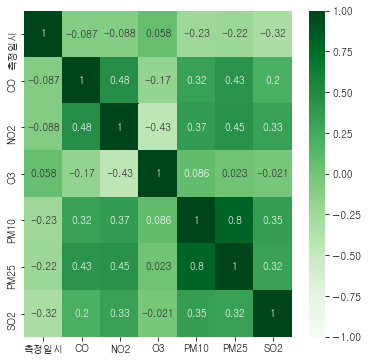

In [154]:
plt.rcParams["figure.figsize"] = (6,6)
sb.heatmap(local_df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1)

In [155]:
local_names = local_df.loc[: 15, '지역']
local_names

0      부산 강서구
1      부산 금정구
2      부산 기장군
3       부산 남구
4       부산 동구
5      부산 동래구
6     부산 부산진구
7       부산 북구
8      부산 사상구
9      부산 사하구
10      부산 서구
11     부산 수영구
12     부산 연제구
13     부산 영도구
14      부산 중구
15    부산 해운대구
Name: 지역, dtype: object

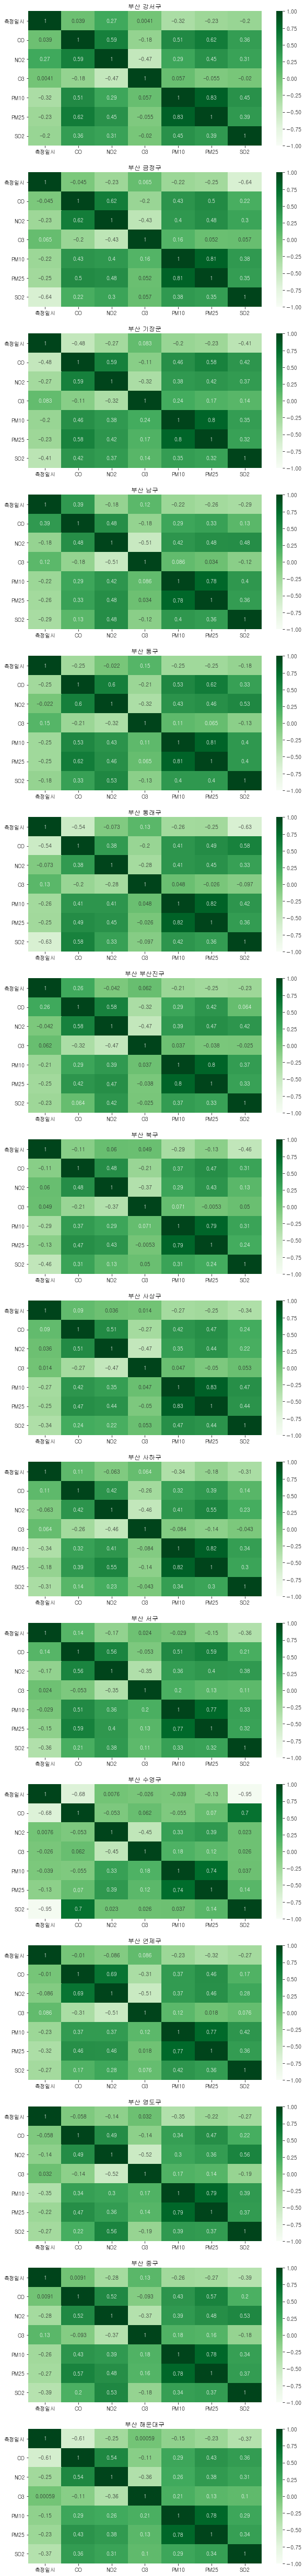

In [156]:
# 폰트 설정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

fig, ax = plt.subplots(len(local_names), figsize=(10, 90))

for ind, local_name in enumerate(local_names):
    condition = (local_df.지역 == local_name)
    new_df = local_df[condition]
    
    new_df.corr(method='pearson')
    
    ax[ind].set_title(local_name)
    plt.rcParams["figure.figsize"] = (6,6)
    sb.heatmap(new_df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1, ax=ax.flat[ind])

plt.show()

### DataLoad

In [157]:
file_path = './부산 기상 자료.csv'
busan_df = pd.read_csv(file_path, sep=',')
busan_df = busan_df.drop(['지점', '지점명'], axis=1)
busan_df[:]

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),년월일
0,-2.4,0.0,1.8,340.0,54.0,2.8,-10.4,1012.3,1021.2,0.0,0.0,2.888889,2.888889,1605.555556,-2.1,20130101
1,-2.5,0.0,1.9,340.0,53.0,2.7,-10.7,1013.3,1022.2,0.0,0.0,2.888889,2.888889,1605.555556,-2.2,20130101
2,-2.0,0.0,1.7,320.0,52.0,2.8,-10.5,1013.4,1022.3,0.0,0.0,6.000000,6.000000,2000.000000,-1.5,20130101
3,-2.3,0.0,2.1,320.0,54.0,2.8,-10.3,1013.0,1021.9,0.0,0.0,0.000000,0.000000,2000.000000,-2.4,20130101
4,-2.5,0.0,0.4,0.0,55.0,2.8,-10.3,1012.2,1021.1,0.0,0.0,0.000000,0.000000,2000.000000,-2.6,20130101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70122,0.6,0.0,6.2,270.0,41.0,2.6,-11.1,1014.0,1022.8,0.0,0.0,1.000000,0.000000,5000.000000,-0.5,20201231
70123,0.1,0.0,6.0,270.0,44.0,2.7,-10.7,1014.8,1023.6,0.0,0.0,2.000000,0.000000,5000.000000,-0.8,20201231
70124,-0.2,0.0,5.0,290.0,48.0,2.9,-9.9,1014.6,1023.4,0.0,0.0,0.000000,0.000000,5000.000000,-1.0,20201231
70125,-0.7,0.0,2.7,270.0,51.0,3.0,-9.6,1014.8,1023.6,0.0,0.0,0.000000,0.000000,5000.000000,-1.3,20201231


In [158]:
condition = (local_df.지역 == local_names[0])
new_df = local_df[condition].reset_index()
new_df['PM10']

0        44.5
1        42.0
2        44.0
3        50.5
4        49.0
         ... 
70123    12.0
70124    13.2
70125    13.6
70126    15.6
70127    20.4
Name: PM10, Length: 70128, dtype: float64

In [159]:
# 개수가 1개 차이남 (2020년 12월 31일 데이터 개수 차이)
new_df = new_df.drop(70127)
new_df

,index,측정일시,지역,CO,NO2,O3,PM10,PM25,SO2
0,0,2013010101,부산 강서구,0.50,0.02200,0.0170,44.5,NaN,0.00800
1,16,2013010102,부산 강서구,0.50,0.02000,0.0140,42.0,NaN,0.00950
2,32,2013010103,부산 강서구,0.50,0.02000,0.0150,44.0,NaN,0.01150
3,48,2013010104,부산 강서구,0.50,0.02150,0.0085,50.5,NaN,0.01150
4,64,2013010105,부산 강서구,0.50,0.02300,0.0080,49.0,NaN,0.01200
...,...,...,...,...,...,...,...,...,...
70122,1121952,2020123119,부산 강서구,0.30,0.01564,0.0248,15.2,12.800000,0.00280
70123,1121968,2020123120,부산 강서구,0.26,0.01100,0.0286,12.0,9.600000,0.00258
70124,1121984,2020123121,부산 강서구,0.32,0.01342,0.0254,13.2,9.200000,0.00286
70125,1122000,2020123122,부산 강서구,0.30,0.01722,0.0214,13.6,11.171621,0.00260


In [160]:
busan_df['PM10'] = new_df['PM10']
busan_df['PM25'] = new_df['PM25']

In [161]:
busan_df

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),년월일,PM10,PM25
0,-2.4,0.0,1.8,340.0,54.0,2.8,-10.4,1012.3,1021.2,0.0,0.0,2.888889,2.888889,1605.555556,-2.1,20130101,44.5,NaN
1,-2.5,0.0,1.9,340.0,53.0,2.7,-10.7,1013.3,1022.2,0.0,0.0,2.888889,2.888889,1605.555556,-2.2,20130101,42.0,NaN
2,-2.0,0.0,1.7,320.0,52.0,2.8,-10.5,1013.4,1022.3,0.0,0.0,6.000000,6.000000,2000.000000,-1.5,20130101,44.0,NaN
3,-2.3,0.0,2.1,320.0,54.0,2.8,-10.3,1013.0,1021.9,0.0,0.0,0.000000,0.000000,2000.000000,-2.4,20130101,50.5,NaN
4,-2.5,0.0,0.4,0.0,55.0,2.8,-10.3,1012.2,1021.1,0.0,0.0,0.000000,0.000000,2000.000000,-2.6,20130101,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70122,0.6,0.0,6.2,270.0,41.0,2.6,-11.1,1014.0,1022.8,0.0,0.0,1.000000,0.000000,5000.000000,-0.5,20201231,15.2,12.800000
70123,0.1,0.0,6.0,270.0,44.0,2.7,-10.7,1014.8,1023.6,0.0,0.0,2.000000,0.000000,5000.000000,-0.8,20201231,12.0,9.600000
70124,-0.2,0.0,5.0,290.0,48.0,2.9,-9.9,1014.6,1023.4,0.0,0.0,0.000000,0.000000,5000.000000,-1.0,20201231,13.2,9.200000
70125,-0.7,0.0,2.7,270.0,51.0,3.0,-9.6,1014.8,1023.6,0.0,0.0,0.000000,0.000000,5000.000000,-1.3,20201231,13.6,11.171621


### Pearson Correlation Coefficient

In [162]:
busan_df.corr(method='pearson')

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),시정(10m),지면온도(°C),년월일,PM10,PM25
기온(°C),1.000000,0.048137,0.031167,-0.266685,0.494170,0.890910,0.915354,-0.682798,-0.702888,0.186779,0.278333,0.014707,0.194055,-0.149770,0.897541,0.007049,-0.059737,-0.123589
강수량(mm),0.048137,1.000000,0.045341,-0.055614,0.195028,0.117370,0.108688,-0.134013,-0.132750,-0.083347,-0.071431,0.023922,0.187486,-0.189571,0.023494,0.017385,-0.089249,-0.082004
풍속(m/s),0.031167,0.045341,1.000000,0.270193,-0.070462,0.023070,-0.011743,-0.168231,-0.164622,0.173914,0.213480,-0.005898,0.033631,0.023789,0.123401,-0.032838,-0.062148,-0.160449
풍향(16방위),-0.266685,-0.055614,0.270193,1.000000,-0.336409,-0.261140,-0.342759,0.094062,0.102391,0.093146,0.047052,-0.069377,-0.251514,0.017177,-0.207035,-0.002273,0.129270,0.135341
습도(%),0.494170,0.195028,-0.070462,-0.336409,1.000000,0.736351,0.795159,-0.541565,-0.547754,-0.379248,-0.295370,0.107356,0.512899,-0.427718,0.307322,0.018426,-0.176508,-0.076741
증기압(hPa),0.890910,0.117370,0.023070,-0.261140,0.736351,1.000000,0.948730,-0.712914,-0.728307,-0.035226,0.057439,0.043344,0.333408,-0.282711,0.750576,0.016021,-0.176401,-0.160297
이슬점온도(°C),0.915354,0.108688,-0.011743,-0.342759,0.795159,0.948730,1.000000,-0.710654,-0.727575,-0.043695,0.055657,0.055550,0.354893,-0.283991,0.757433,0.011857,-0.113963,-0.107183
현지기압(hPa),-0.682798,-0.134013,-0.168231,0.094062,-0.541565,-0.712914,-0.710654,1.000000,0.998057,0.045101,-0.053712,-0.042218,-0.297235,0.280801,-0.584533,0.002986,0.113567,0.168918
해면기압(hPa),-0.702888,-0.132750,-0.164622,0.102391,-0.547754,-0.728307,-0.727575,0.998057,1.000000,0.038003,-0.061835,-0.042033,-0.298205,0.279738,-0.602973,0.001275,0.113012,0.169168
일조(hr),0.186779,-0.083347,0.173914,0.093146,-0.379248,-0.035226,-0.043695,0.045101,0.038003,1.000000,0.806590,-0.069657,-0.334276,0.138304,0.429448,0.007017,0.130142,0.023604


<AxesSubplot:>

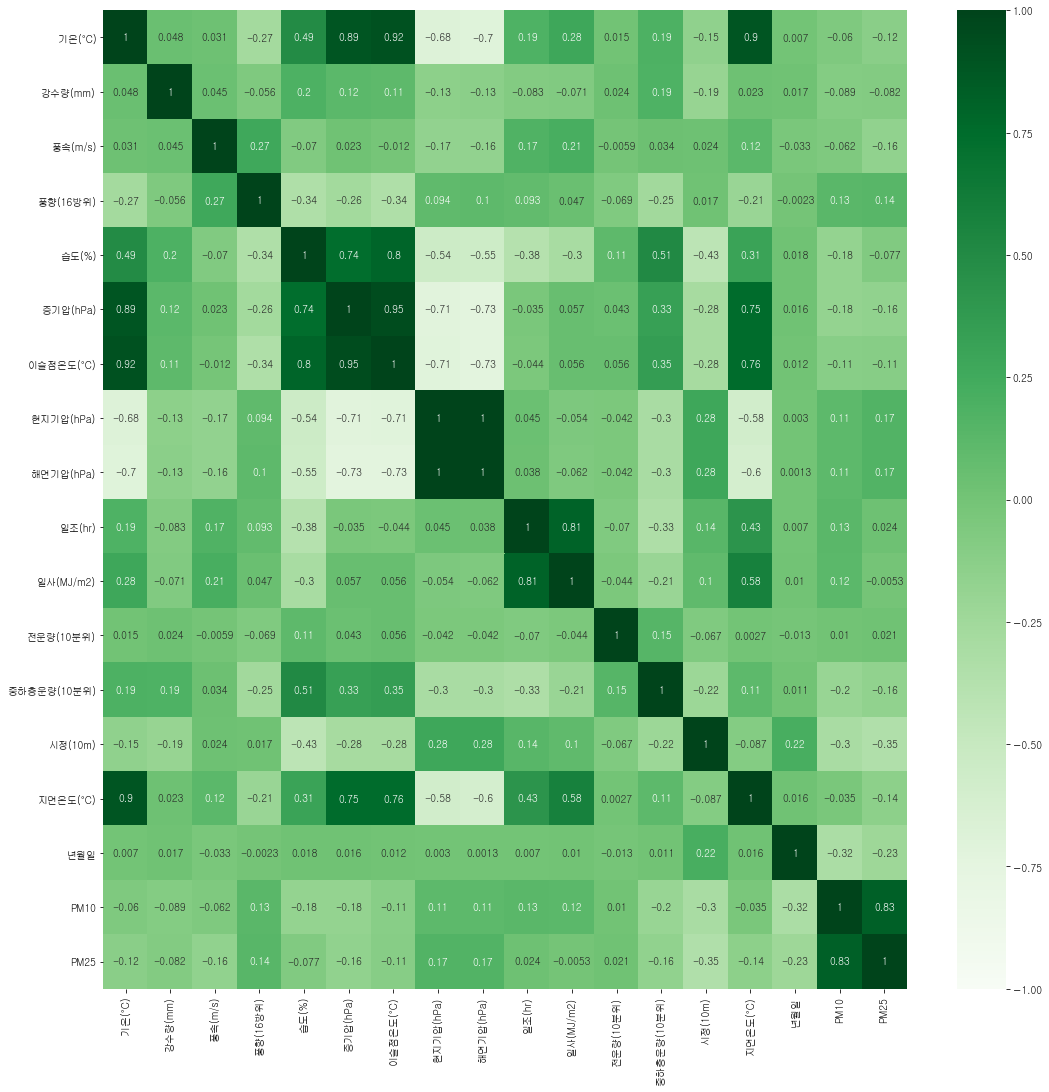

In [163]:
plt.rcParams["figure.figsize"] = (18, 18)
sb.heatmap(busan_df.corr(method='pearson'), annot = True, cmap = 'Greens', vmin = -1, vmax=1)